## **House Price Predictions Using Python**

##### This analysis will use the CRISP-DM approach, especially in steps 1 – 4, namely business understanding, data understanding, data preparation and data modeling. The dataset used comes from the Kaggle.com website with the following link https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data. 

### **Business Understanding**

##### House is one of the most basic human needs. The house will protect people from the heat of the sun, rain, wind, and much more. Considering how important the function of a house is, many people ultimately want to have their own house. However, most people will consider how much the house is worth. The price of a house is assumed to be more expensive if the house has more features, for example area, number of bedrooms, number of bathrooms, and location of the house. Therefore, this analysis will create a machine learning model that will predict the price of a house based on several features the house has.

### **Data Understanding**

##### This analysis will use house price data which has several features. Download link is included in the subtitle section. After downloading, I will immediately import the data for analysis. I will use a multiple linear regression algorithm to predict house prices.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('housing_price_dataset.csv')
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [3]:
df.shape

(50000, 6)

##### The data set has 50,000 rows and 6 columns. A large number of rows has benefits, especially when used in the model training process.

In [4]:
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [5]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


##### In the description above there is some information that can be obtained, for example the average of each house feature, standard deviation, quantiles, minimum and maximum values. Please note that the describe() function only returns columns of numeric type. Next, I will check the normality of the data using a Kernel Density Estimate (KDE).

c:\Users\ASUS A409JP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Normality Visualization SquareFeet')

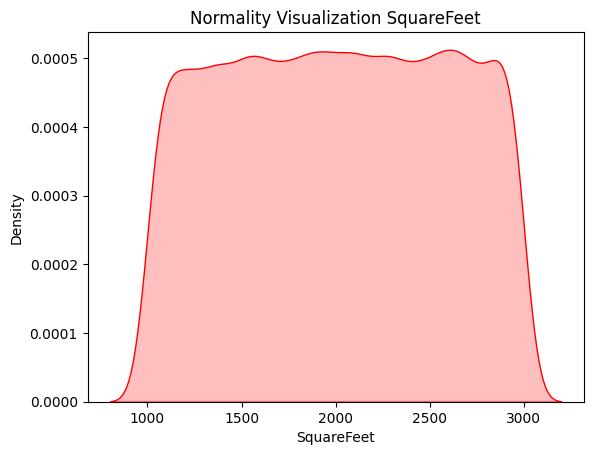

In [6]:
sns.kdeplot(data=df['SquareFeet'], fill=True, color='red')
plt.title('Normality Visualization SquareFeet')

c:\Users\ASUS A409JP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Normality Visualization Bedrooms')

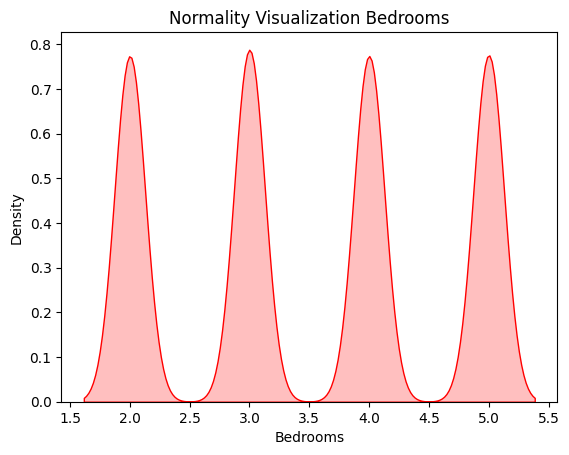

In [7]:
sns.kdeplot(data=df['Bedrooms'], fill=True, color='red')
plt.title('Normality Visualization Bedrooms')

c:\Users\ASUS A409JP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Normality Visualization Bathrooms')

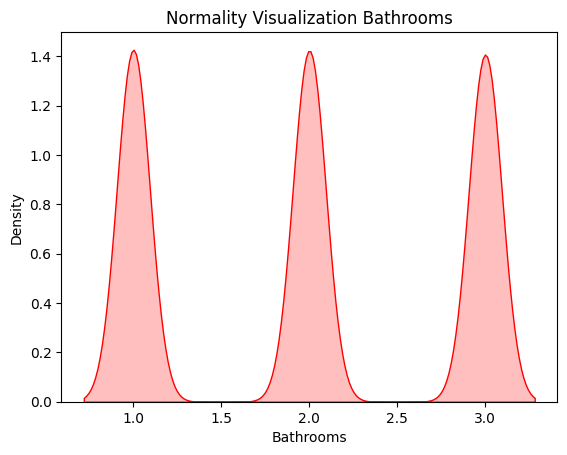

In [8]:
sns.kdeplot(data=df['Bathrooms'], fill=True, color='red')
plt.title('Normality Visualization Bathrooms')

c:\Users\ASUS A409JP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Normality Visualization Price')

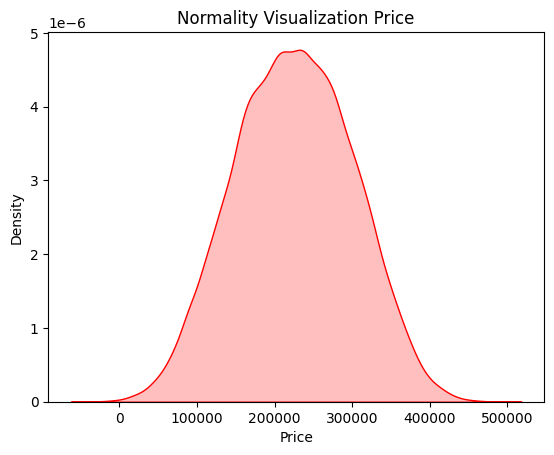

In [9]:
sns.kdeplot(data=df['Price'], fill=True, color='red')
plt.title('Normality Visualization Price')

##### Some of the visualizations above show how the data is distributed. The majority of data is normally distributed, but price data has a minimum value below 0 or negative. So, in the next step, I will address that.

### **Data Preparation**

##### Once I understand how the data works, the next step is to prepare the data to make it better. In this step I will correct the data so it can be used in the next step.

In [10]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [11]:
df['Price'].min()

-36588.16539749279

##### In the code above, it can be seen that the minimum value is -36588. This value is below 0, and should be removed because it can lead to misinterpretation of the data.

In [12]:
(df['Price'] <= 0).sum()

22

##### In the Price column there are 22 data whose values ​​are below 0. I will only filter data whose values ​​are above 0.

In [13]:
df_filter = df[df['Price'] >= 0]
df_filter

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


##### The filtered data has a total of 49,978 rows compared to 50,000 before filtering. Now, I'll see what KDE looks like in the Price column after filtering.

In [14]:
df_filter['Price'].min()

154.77912007166017

##### Now the minimum value of the Price column is 154.77 and the data is ready to be used again. Here is the KDE plot for the new Price column.

c:\Users\ASUS A409JP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

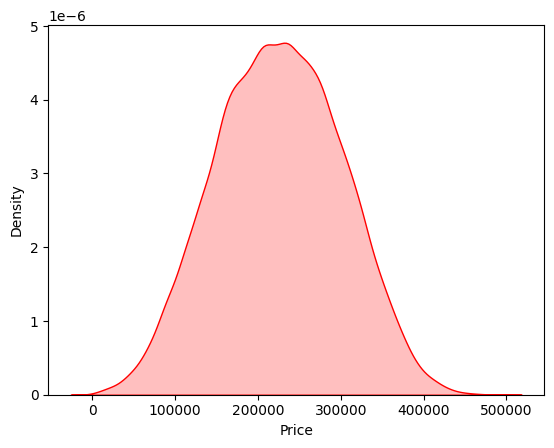

In [15]:
sns.kdeplot(data=df_filter['Price'], fill=True, color='red')

##### Next, I will deal with outlier data. Outlier data is data that deviates far from the mean. Outliers should be removed as they can lead to misinterpretation. To identify outliers, I will use a box plot.

<Axes: >

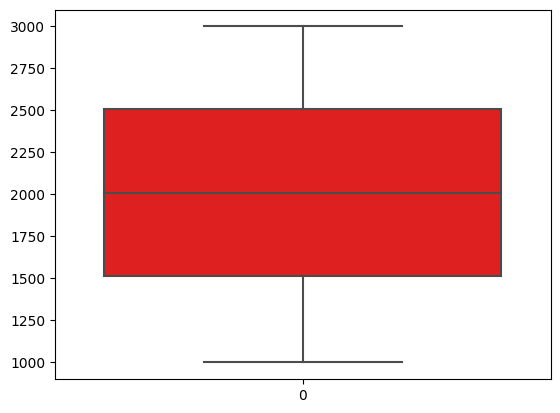

In [16]:
sns.boxplot(data=df_filter['SquareFeet'], color='red')

<Axes: >

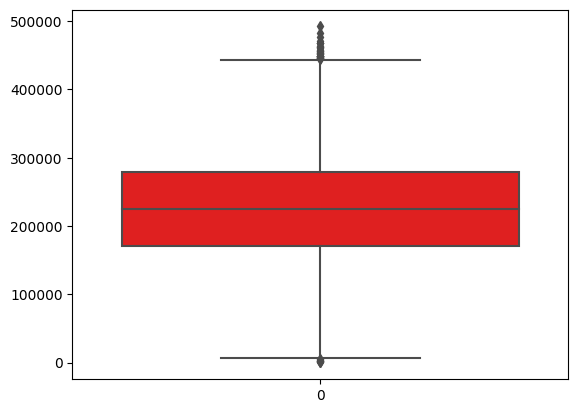

In [17]:
sns.boxplot(data=df_filter['Price'], color='red')

##### The two boxplot charts above show the data distribution for the SquareFeet and Price columns. The way to read a boxplot is that if there is data that comes out of the tail then the data is an outlier. In a SquareFeet box plot, no data comes out of the tail. Meanwhile, in the Price boxplot there is data coming out of the tail. This data should be removed to avoid misinterpretation.

In [18]:
q1 = df_filter['Price'].quantile(0.25)
q3 = df_filter['Price'].quantile(0.75)
iqr = q3 - q1

print('first quantile is =', q1)
print('third quantile is =', q3)
print('IQR is =', iqr)

first quantile is = 170007.4871298562
third quantile is = 279395.82628817466
IQR is = 109388.33915831847


In [19]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print('lower bound is =', lower_bound)
print('upper bound is =', upper_bound)

lower bound is = 5924.978392378485
upper bound is = 443478.33502565237


In [20]:
outlier = df_filter[(df_filter['Price'] < lower_bound) | (df_filter['Price'] > upper_bound)]
print(f'outlier shape is = {outlier.shape}')

outlier shape is = (37, 6)


In [21]:
df_clean = df_filter[(df_filter['Price'] > lower_bound) & (df_filter['Price'] < upper_bound)]
print(f'clean data shape is = {df_clean.shape}')

clean data shape is = (49941, 6)


In [22]:
print('The new dataset is df_clean, with the following values = \n\n', df_clean)

The new dataset is df_clean, with the following values = 

        SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[49

<Axes: >

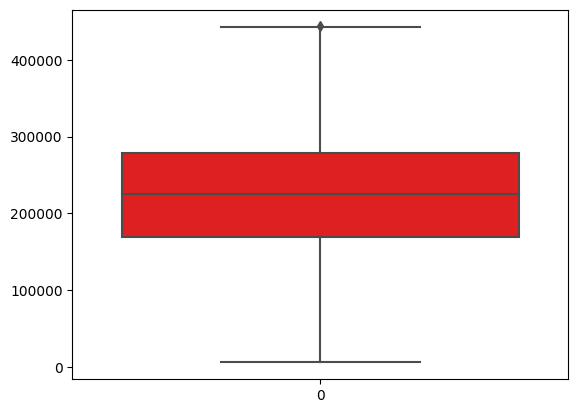

In [23]:
sns.boxplot(data=df_clean['Price'], color='red')

##### As seen in the boxplot above, the data is clean of outliers and ready to proceed to the next step. Previously I would filter the columns. I will delete unused columns and keep used columns.

In [24]:
df_clean.drop(columns=['Neighborhood', 'YearBuilt'], inplace=True)

C:\Users\ASUS A409JP\AppData\Local\Temp\ipykernel_15428\3243082873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['Neighborhood', 'YearBuilt'], inplace=True)


In [25]:
df_clean

,SquareFeet,Bedrooms,Bathrooms,Price
0,2126,4,1,215355.283618
1,2459,3,2,195014.221626
2,1860,2,1,306891.012076
3,2294,2,1,206786.787153
4,2130,5,2,272436.239065
...,...,...,...,...
49995,1282,5,3,100080.865895
49996,2854,2,2,374507.656727
49997,2979,5,3,384110.555590
49998,2596,5,2,380512.685957


##### Next, I want to see the correlation relationship between variables using several visualizations, namely using scatter plots and heatmaps.

Text(0.5, 1.0, 'Scatter Plot SquareFeet and Price')

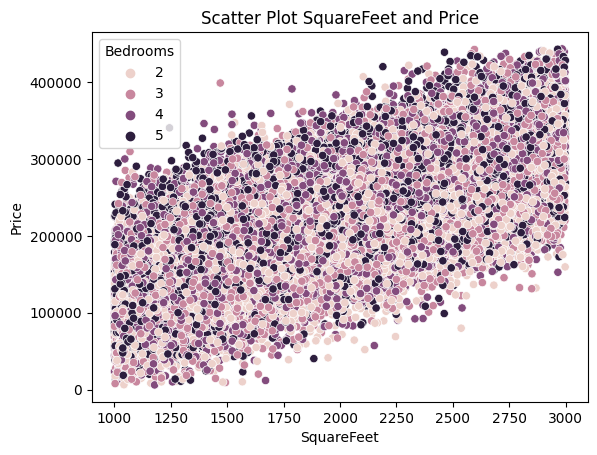

In [26]:
sns.scatterplot(data=df_clean, x='SquareFeet', y='Price', hue='Bedrooms')
plt.title('Scatter Plot SquareFeet and Price')

<Axes: xlabel='SquareFeet', ylabel='Price'>

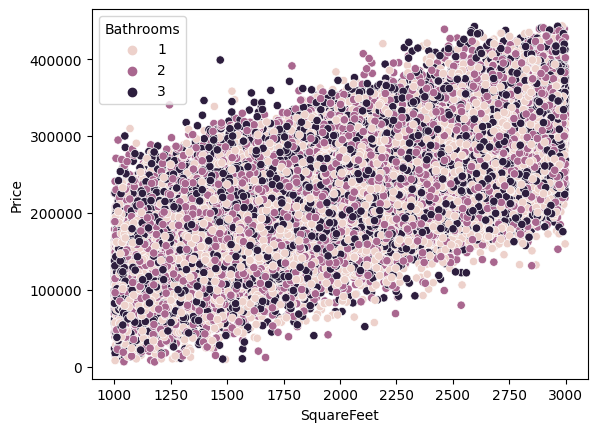

In [27]:
sns.scatterplot(data=df_clean, x=df_clean['SquareFeet'], y=df_clean['Price'], hue='Bathrooms')

<Axes: >

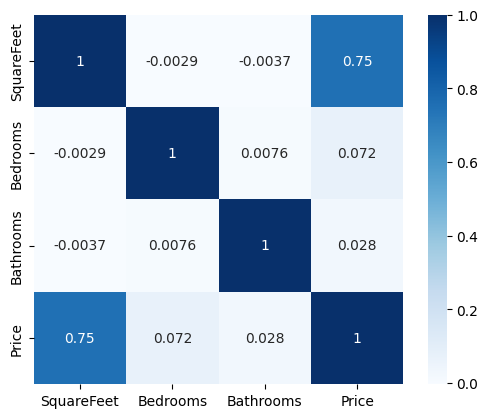

In [28]:
corr = df_clean.corr()

sns.heatmap(data=corr,
            annot=True,
            square=True,
            cmap='Blues')

##### The 3 data visualizations above are used to see the relationship between variables in the dataset. In the first two visualizations, it can be seen that SquareFeet has a positive influence on house prices. The wider the SquareFeet, the more expensive the house price will be. The scatter plot also includes attributes in the form of Bedrooms and Bathrooms to add insight. The third visualization is a heatmap which is used to see the relationship between variables. It seems that variables with the same name have a value of 1 which means they are perfectly correlated (this is normal because they are the same variable). The heatmap shows that the SquareFeet and Price variables have a fairly strong correlation, namely 0.75.

##### The data is ready to be entered into the next step, namely Data Modeling. The model in this analysis will use Multiple Linear Regression which will predict house prices using 3 variables, namely Square Feet, Bedrooms and Bathrooms.

### **Data Modelling**

##### As previously explained, this analysis will use the Multiple Linear Regression model.

In [29]:
df_clean.head(5)

,SquareFeet,Bedrooms,Bathrooms,Price
0,2126,4,1,215355.283618
1,2459,3,2,195014.221626
2,1860,2,1,306891.012076
3,2294,2,1,206786.787153
4,2130,5,2,272436.239065


In [30]:
x = df_clean[['SquareFeet', 'Bedrooms', 'Bathrooms']]
y = df_clean['Price']

print(x.shape)
print(y.shape)

(49941, 3)
(49941,)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('x train shape is =', x_train.shape)
print('y train shape is =', y_train.shape)
print('x test shape is =', x_test.shape)
print('y test shape is =', y_test.shape)

x train shape is = (39952, 3)
y train shape is = (39952,)
x test shape is = (9989, 3)
y test shape is = (9989,)


In [32]:
model = LinearRegression()
model.fit(x_train, y_train)

# model evaluation
print('model cofficient is = ', model.coef_)
print('model intercept is = ', model.intercept_)

model cofficient is =  [  98.89633105 5130.85309168 3052.36013555]
model intercept is =  2182.8468393389485


##### Apart from using scikit learn, I will also use statsmodels to evaluate the model.

In [33]:
x_train = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, x_train).fit() # for OLS you need to remember that the first variable is the dependent variable, not the independent variable
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 1.767e+04
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:24:21   Log-Likelihood:            -4.8872e+05
No. Observations:               39952   AIC:                         9.775e+05
Df Residuals:                   39948   BIC:                         9.775e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2182.8468   1338.596      1.631      0.103    -440.833    4806.527
SquareFeet    98.8963      0.432    228.993      0.000      98.050      99.743
Bedrooms    5130.8531    223.005     23.008      0.000    4693.759    5567.947
Bathrooms   3052.3601    304.931     10.010      0.000    2454.689    3650.031
==============================================================================
Omnibus:                       11.655   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.926
Skew:                           0.011   Prob(JB):                      0.00424
Kurtosis:                       2.922   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# predictions
y_pred = model.predict(x_test)

print('housing predictions is =\n', y_pred)

housing predictions is =
 [260241.82025264 210880.79493775 198850.71091829 ... 235888.14056561
 152109.52204241 163434.06828094]


In [35]:
# see actual value and predicted value
housing_dataframe = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
print('Comparison Table Housing Price = \n', housing_dataframe)

Comparison Table Housing Price = 
         Actual Value  Predicted Value
40554  244884.696405    260241.820253
25119  234923.838176    210880.794938
25049  202812.025586    198850.710918
29212  216946.282741    181520.340740
14188  104926.274584    138500.436735
...              ...              ...
43683  397980.145589    293197.810737
31522  207548.415602    237975.049636
14791  204893.912032    235888.140566
26847  102119.060270    152109.522042
33051  206907.480175    163434.068281

[9989 rows x 2 columns]


Model residual = (9989,)


Text(0.5, 1.0, 'Scatter Plot Residual')

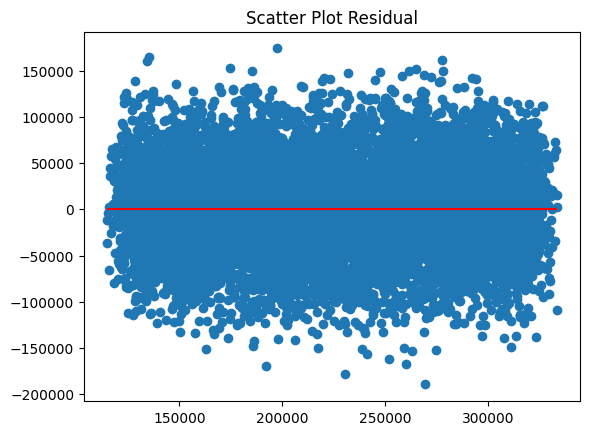

In [36]:
# visualization model
residual = y_test - y_pred
print('Model residual =', residual.shape)

plt.scatter(y_pred, residual)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red')
plt.title('Scatter Plot Residual')

##### The above model is visualized using residuals. A good model is a model that has residuals that are not patterned. From the visualization above, it can be seen that the plotted residuals have no pattern or trend. So with this it can be said that the model is good at explaining variables.

In [37]:
df_clean.head()

,SquareFeet,Bedrooms,Bathrooms,Price
0,2126,4,1,215355.283618
1,2459,3,2,195014.221626
2,1860,2,1,306891.012076
3,2294,2,1,206786.787153
4,2130,5,2,272436.239065


##### Next I will try to use the model that has been created to predict house prices.

In [38]:
# make house prediction
model.predict([[3500, 3, 4]])

c:\Users\ASUS A409JP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([375922.00531901])

##### In the code above I tried to enter data on the area of ​​the house of 3500, number of bedrooms 3, and bathrooms 4, resulting in a predicted price of $375922,005. That's all the Housing Price Prediction analysis made. I would like to thank all those who have helped me in working on this project.